In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 159', 'Unnamed: 160', 'Unnamed: 161', 'Unnamed: 162',
       'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166',
       'Unnamed: 167', 'Unnamed: 168'],
      dtype='object', length=169)

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [6]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z ]', ' ', text)
    return text

df['clean_resume'] = df['Resume_str'].apply(clean_text)
df[['Resume_str', 'clean_resume']].head()

,Resume_str,clean_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administrator marketing associate ...
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations ...
2,HR DIRECTOR Summary Over 2...,hr director summary over ...
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedica...
4,HR MANAGER Skill Highlights ...,hr manager skill highlights ...


In [10]:
df['Category'].isna().sum()

np.int64(911)

In [11]:
df = df.dropna(subset=['Category', 'Resume_str'])

In [12]:
df['clean_resume'] = df['Resume_str'].apply(clean_text)

In [13]:
X = df['clean_resume']
y = df['Category']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=3000)),
    ('clf', MultinomialNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=3000, stop_words='english')),
                ('clf', MultinomialNB())])

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
y_pred = model.predict(x_test)

In [19]:
print(x_test.head())

2256             bistro chef       career overview    ...
2660             engineering supervisor         summar...
3234             visual arts teacher       summary    ...
1861                                               liquor
1446             chef       summary      quality focus...
Name: clean_resume, dtype: object


In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5384615384615384


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
print(classification_report(y_test, y_pred, zero_division=0))

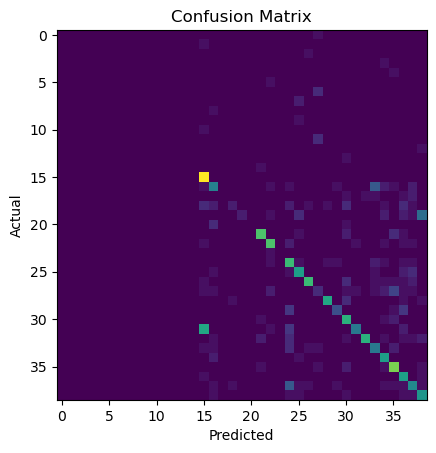

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()